In [ ]:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
!pip install missingpy
import missingno as msno
import matplotlib.pyplot as plt

import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.1 MB/s eta 0:00:00


# Análisis exploratorio de datos



In [ ]:
ruta_archivo = "hotel_bookings.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jessemostipak/hotel-booking-demand",
  ruta_archivo ,
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-1742126295.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'hotel-booking-demand' dataset.


## Estadisticos principales


In [ ]:
print("Forma del dataset:", df.shape)

Forma del dataset: (119390, 32)


In [ ]:
print("Tamaño total (n° de elementos):", df.size)

Tamaño total (n° de elementos): 3820480


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Notamos que hay datos nulos en la columna agent y company

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
columnas_describir = [
    'stays_in_weekend_nights',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'adults',
    'children',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests'
]
display(df[columnas_describir].describe())

,stays_in_weekend_nights,previous_cancellations,previous_bookings_not_canceled,adults,children,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.927599,0.087118,0.137097,1.856403,0.103890,0.221124,2.321149,0.062518,0.571363
std,0.998613,0.844336,1.497437,0.579261,0.398561,0.652306,17.594721,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19.000000,26.000000,72.000000,55.000000,10.000000,21.000000,391.000000,8.000000,5.000000


Dado que el analisis es con respecto a todas las variables numericas consideramos convertir aquellas fechas en tipo de dato numerico a tipo de dato fecha

In [ ]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [ ]:

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
display(df['reservation_status_date'].head())

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03


In [ ]:
display(df.nunique())

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


In [ ]:
display(df['children'].unique())

array([ 0.,  1.,  2., 10.,  3., nan])

No tiene sentido que la variable "children" sea float por lo que representa y además por los datos unicos donde ninguno utiliza decimales. Lo arreglamos después de tratar los valores nulos.

### Valores Faltantes


In [ ]:
datos_faltantes = df.isnull().sum()
Porcentaje_faltante = (datos_faltantes / len(df)) * 100

info_faltante = pd.DataFrame({
    'Cantidad faltante': datos_faltantes,
    'Porcentaje faltante': Porcentaje_faltante
})

display(info_faltante[info_faltante['Cantidad faltante'] > 0])

,Missing Count,Missing Percentage
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


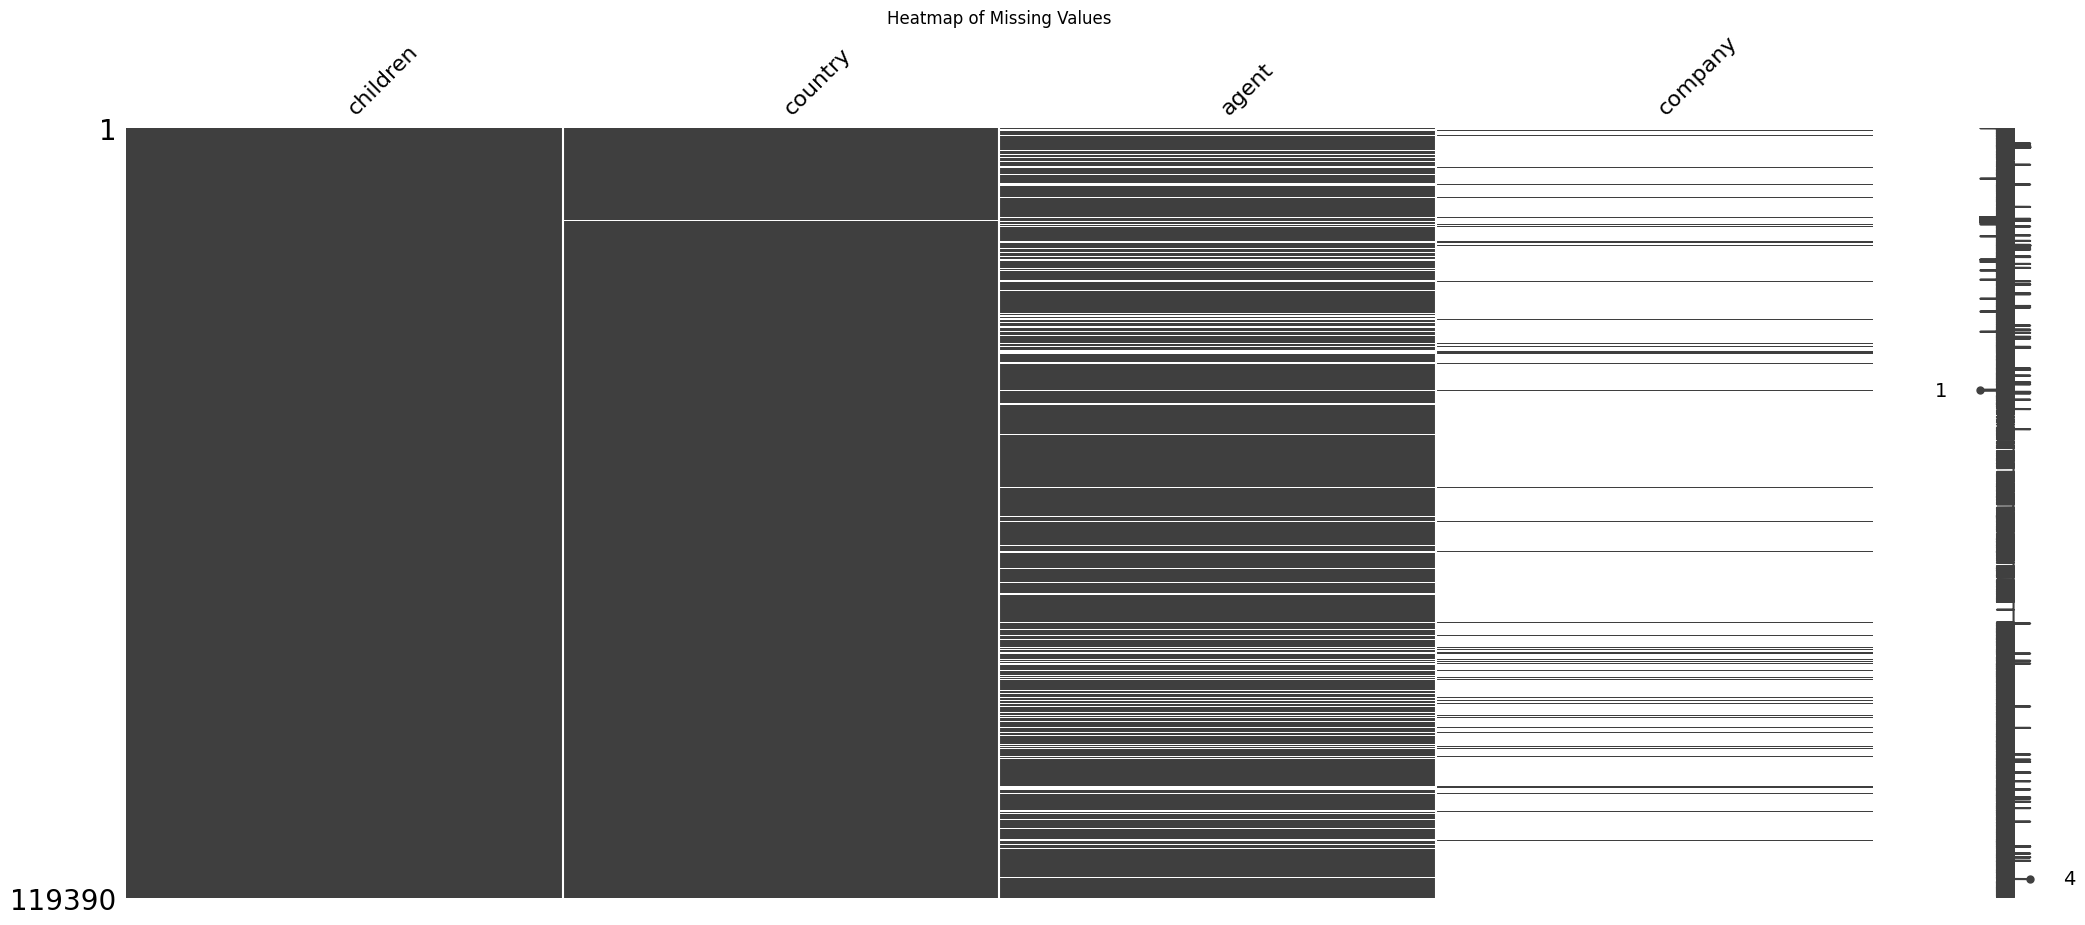

In [ ]:

columnas_con_faltantes = ['children', 'country', 'agent', 'company']

msno.matrix(df[columnas_con_faltantes])
plt.title('Heatmap de Valores Faltantes')
plt.show()

In [ ]:


def littles_mcar_test(df):
    # 1. Crear máscara de faltantes
    missing_mask = df.isnull()

    # 2. Imputar datos (media simple)
    imputer = SimpleImputer(strategy="mean")
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # 3. Calcular estadísticos
    patterns = missing_mask.drop_duplicates()
    chi_square = 0
    dof = 0
    for idx, pattern in patterns.iterrows():
        subset = df.loc[(missing_mask == pattern).all(axis=1)]
        if len(subset) == 0:
            continue
        means = df_imputed.loc[(missing_mask == pattern).all(axis=1)].mean()

        diffs = (subset.fillna(0) - means).fillna(0)

        chi_square += (diffs**2).sum().sum()
        dof += subset.shape[0] * subset.shape[1]
    if dof == 0:
        p_value = 1.0
    else:
        p_value = 1 - chi2.cdf(chi_square, dof)

    return chi_square, dof, p_value

# Seleccionar las columnas numéricas con datos faltantes
missing_values = df.isnull().sum()
missing_data_table = pd.DataFrame({
    'Cantidad Faltantes': missing_values,
    'Porcentaje Faltantes': (missing_values / len(df)) * 100
})

cols_with_missing_numeric = missing_data_table[missing_data_table['Cantidad Faltantes'] > 0].index.intersection(df.select_dtypes(include=np.number).columns).tolist()
df_missing_numeric = df[cols_with_missing_numeric]

# Aplicar la función del test de Little
chi_square_val, dof_val, p_value_val = littles_mcar_test(df_missing_numeric)

print(f"Resultados de la prueba de Little (Little's MCAR test) para columnas numéricas con datos faltantes:")
print(f"Estadístico Chi-cuadrado: {chi_square_val:.4f}")
print(f"Grados de libertad (DOF): {dof_val}")
print(f"Valor p: {p_value_val:.4f}")

alpha = 0.05
if p_value_val < alpha:
    print("\nEl valor p es menor que alpha (0.05), lo que sugiere que los datos no son MCAR (Missing Completely At Random). Es probable que sean MAR (Missing At Random) o MNAR (Missing Not At Random).")
else:
    print("\nEl valor p es mayor o igual que alpha (0.05), lo que sugiere que los datos pueden ser MCAR (Missing Completely At Random).")

Resultados de la prueba de Little (Little's MCAR test) para columnas numéricas con datos faltantes:
Estadístico Chi-cuadrado: 5534307878.4436
Grados de libertad (DOF): 358170
Valor p: 0.0000

El valor p es menor que alpha (0.05), lo que sugiere que los datos no son MCAR (Missing Completely At Random). Es probable que sean MAR (Missing At Random) o MNAR (Missing Not At Random).


#### Tratamiento de valores faltantes

Dado que el porcetaje de datos faltantes en 'company' es cercano al total (94.306893) y Kaggle no describe a que se refiere consideramos eliminar la columna dado que no contribuye al analisis. A partir del test de Little llegamos a que los datos faltantes no son completamente random por lo que optamos por imputar con KNN los datos faltantes de 'children', 'country' y 'agent'

In [ ]:

# Variables a imputar
vars_to_impute = ['children', 'country', 'agent']

df_impute_temp = df[vars_to_impute].copy()

encoders = {}
for col in ['country', 'agent']:
    if col in df_impute_temp.columns:

        df_impute_temp[col] = df_impute_temp[col].astype(str)

        le = LabelEncoder()

        le.fit(df_impute_temp[col].unique())

        df_impute_temp[col + '_encoded'] = le.transform(df_impute_temp[col])
        encoders[col] = le

        df_impute_temp.drop(columns=[col], inplace=True)

n_neighbors = 5
imputer = KNNImputer(n_neighbors=n_neighbors)

df_imputed_array = imputer.fit_transform(df_impute_temp)
df_imputed_knn_temp = pd.DataFrame(df_imputed_array, columns=df_impute_temp.columns, index=df_impute_temp.index)

for original_col, le in encoders.items():
    encoded_col = original_col + '_encoded'

    df_imputed_knn_temp[encoded_col] = df_imputed_knn_temp[encoded_col].round().astype(int)

    inverse_mapping = {i: label for i, label in enumerate(le.classes_)}

    df_imputed_knn_temp[original_col] = df_imputed_knn_temp[encoded_col].map(inverse_mapping).fillna('Unknown')

    if original_col == 'agent':
        df_imputed_knn_temp[original_col] = pd.to_numeric(df_imputed_knn_temp[original_col], errors='coerce')
        df_imputed_knn_temp[original_col] = df_imputed_knn_temp[original_col].fillna(0).astype(int)

    df[original_col] = df_imputed_knn_temp[original_col]

df['children'] = df_imputed_knn_temp['children'].round().astype('Int64') # Use 'Int64' to support potential NaNs if needed, though imputation should fill.

print("Verificación de datos faltantes después de KNNImputer:")
print(df[vars_to_impute].isnull().sum())
print("\nPrimeras filas del DataFrame con datos imputados:")
display(df[vars_to_impute].head(10))

Verificación de datos faltantes después de KNNImputer:
children    0
country     0
agent       0
dtype: int64

Primeras filas del DataFrame con datos imputados:


,children,country,agent
0,0,PRT,0
1,0,PRT,0
2,0,GBR,0
3,0,GBR,304
4,0,GBR,240
5,0,GBR,240
6,0,PRT,0
7,0,PRT,303
8,0,PRT,240
9,0,PRT,15


In [ ]:

if 'company' in df.columns:
    df.drop('company', axis=1, inplace=True)
    print("Columna 'company' eliminada.")
else:
    print("Columna 'company' no esta en el DataFrame.")

print("Columnas en el DataFrame:")
display(df.columns)

Column 'company' dropped.
Current columns in the DataFrame:


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#cambiamos el datatype de children a int
df['children'] = df['children'].astype('Int64')

# verificamos
print("Tipo de dato de columna 'children' :", df['children'].dtype)

Data type of 'children' column: Int64


### Duplicados


In [ ]:
duplicate_rows = df.duplicated()
num_duplicate_rows = duplicate_rows.sum()
percentage_duplicate_rows = (num_duplicate_rows / len(df)) * 100

print(f"Numero de filas duplicadas: {num_duplicate_rows}")
print(f"Porcentaje de columnas duplicadas: {percentage_duplicate_rows:.2f}%")

Numero de filas duplicadas: 32001
Porcentaje de columnas duplicadas: 26.80%


Dado que son duplicados en todas las variables de la fila no tendría sentido considerarlos para el analisis

In [ ]:
# Elimina los duplicados, manteniendo la PRIMERA aparición (predeterminado: keep='first')
df.drop_duplicates(keep='first', inplace=True)

print(f"Number of rows after dropping duplicates: {len(df)}")

Number of rows after dropping duplicates: 87389


## Visualización de las distribuciones


Visualizing Distributions of Numerical Variables:


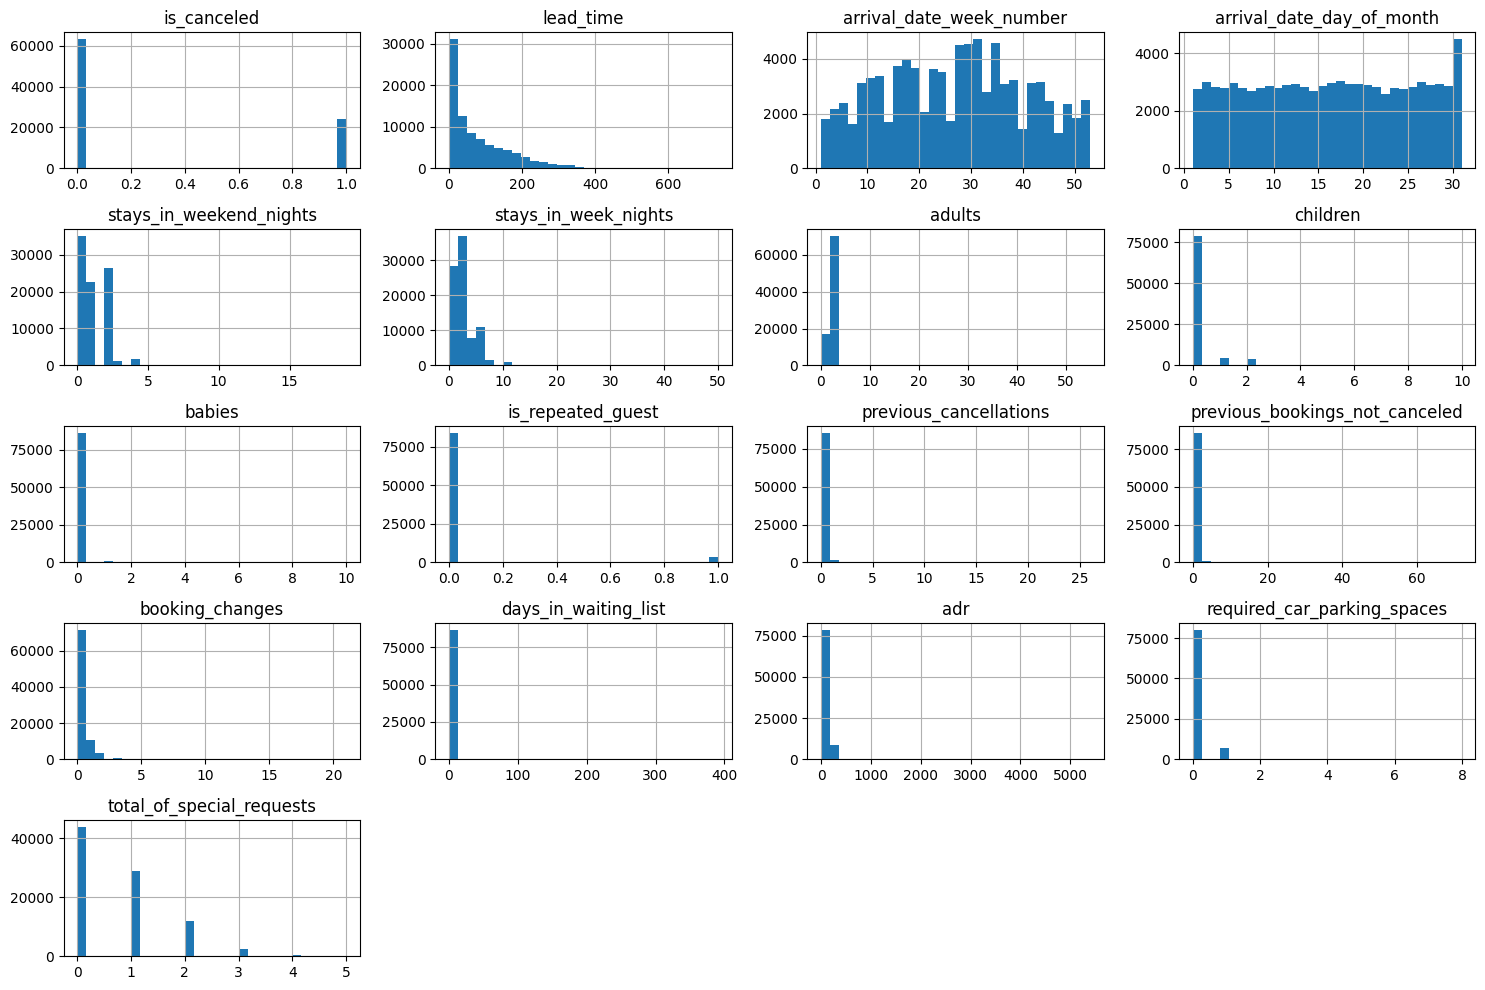

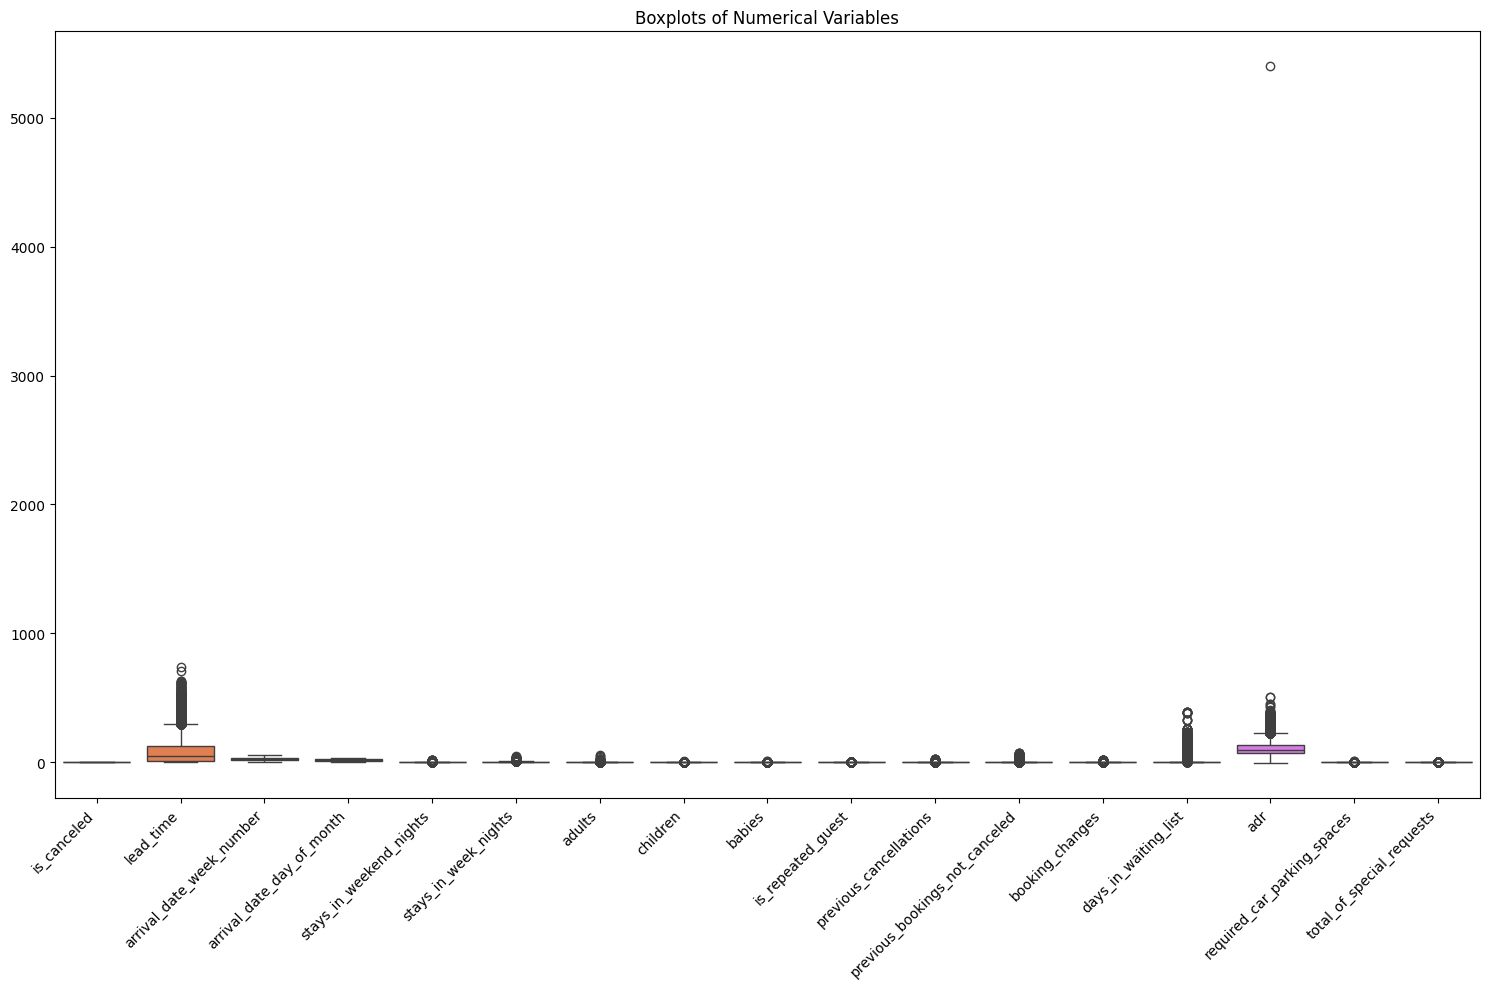


Visualizing Distributions of Categorical Variables:


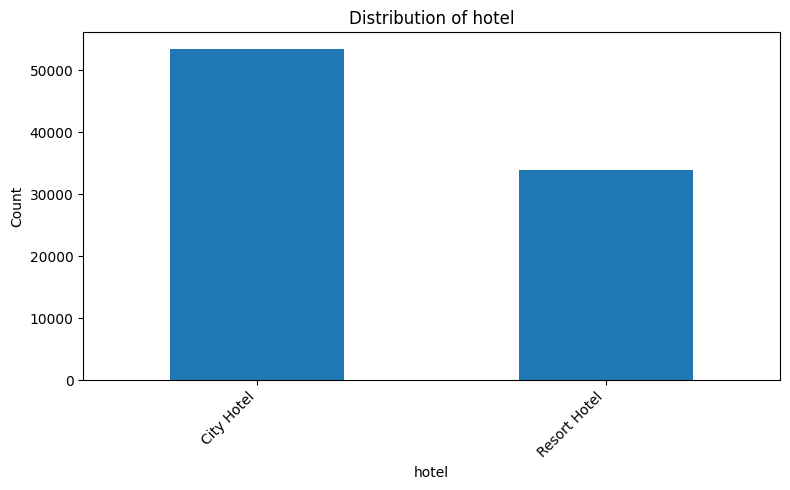

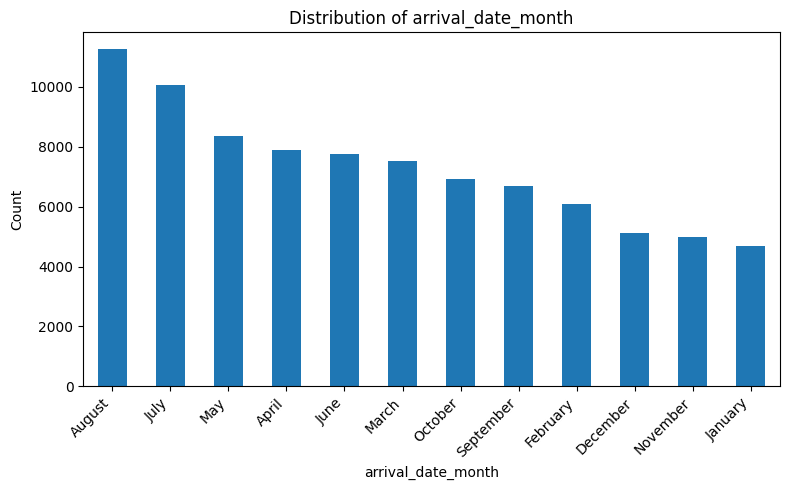

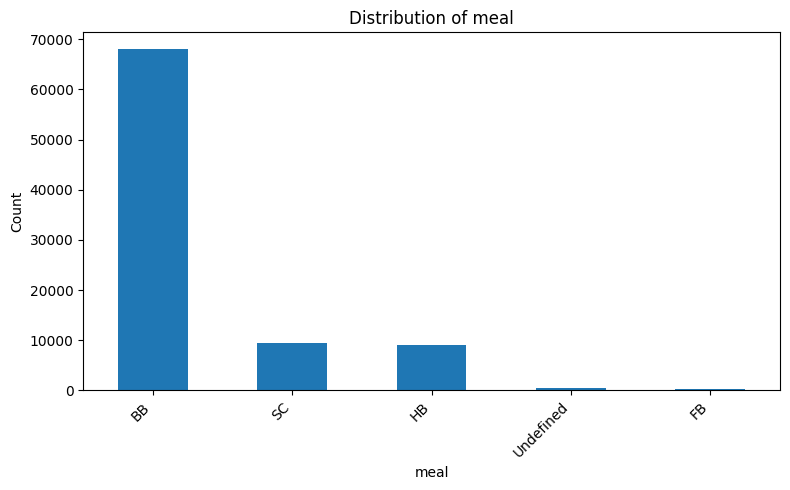

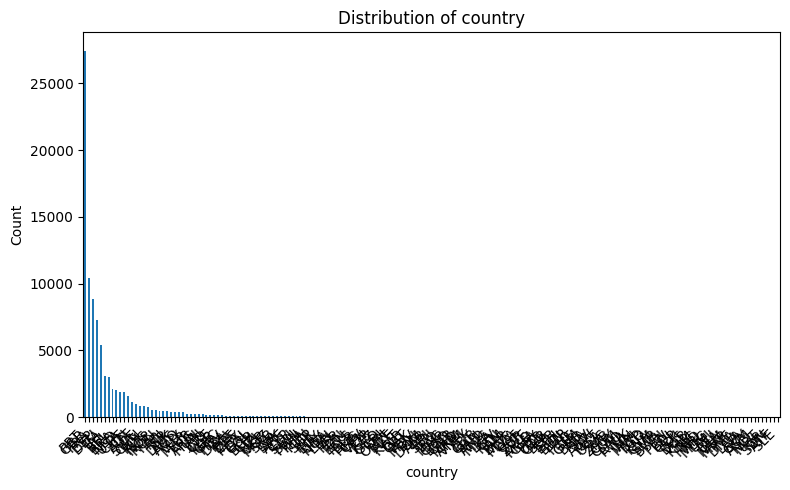

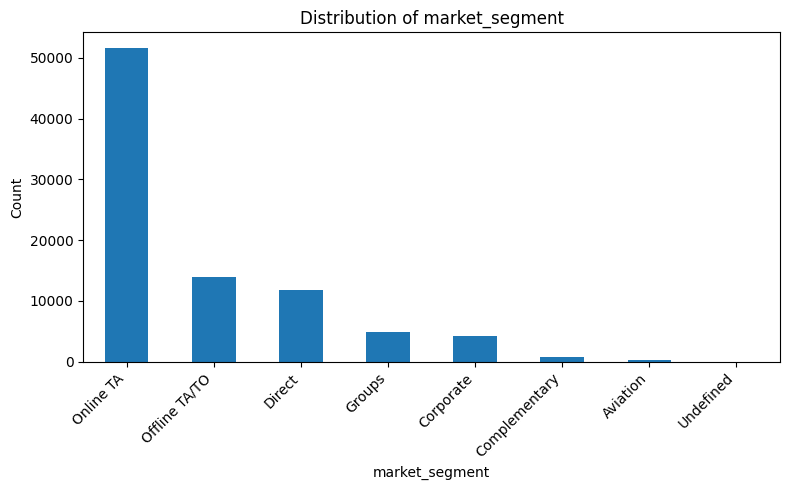

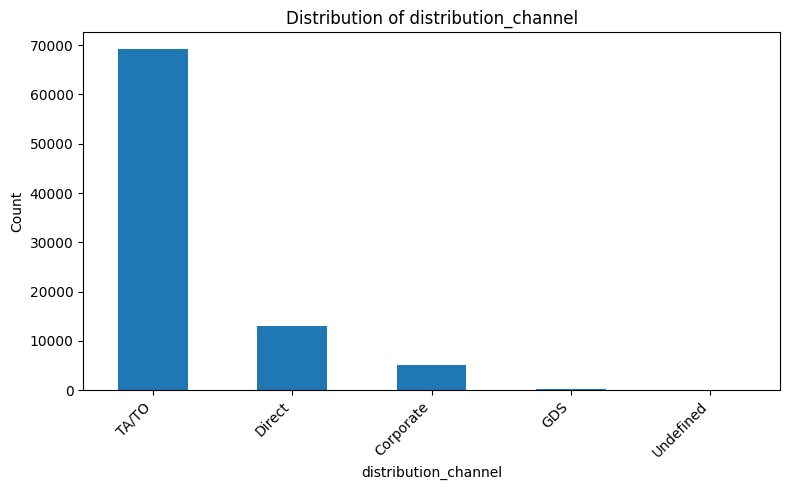

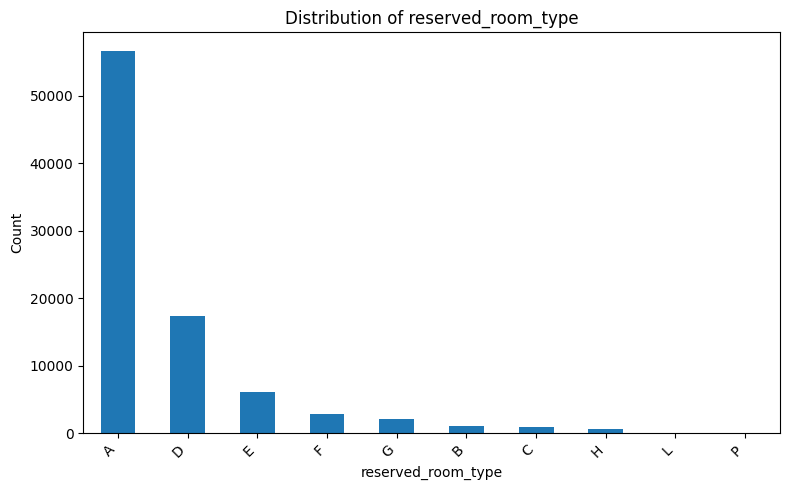

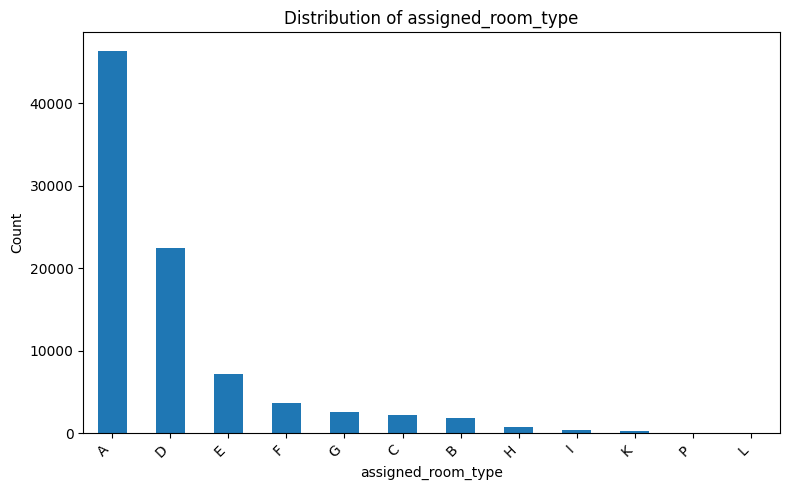

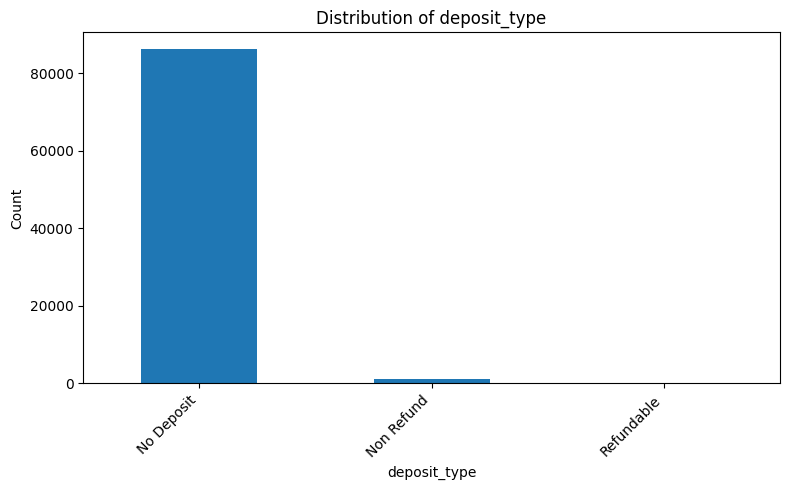

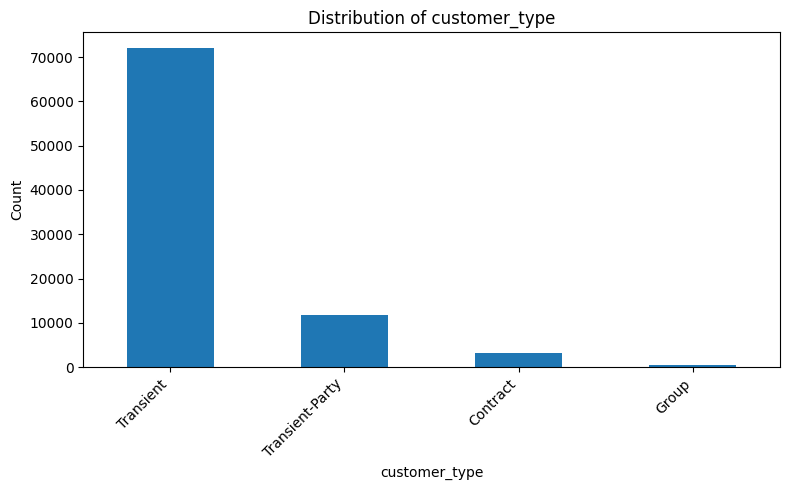

In [ ]:


numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_viz = [col for col in numerical_cols if col not in ['arrival_date_year', 'agent', 'company']]


print("Visualizing Distributions of Numerical Variables:")
df[numerical_cols_for_viz].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols_for_viz])
plt.title('Boxplots of Numerical Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols_for_viz = [col for col in categorical_cols if col not in ['reservation_status', 'reservation_status_date']]

print("\nVisualizing Distributions of Categorical Variables:")
for col in categorical_cols_for_viz:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-389983946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_countries.index, y=top_20_countries.values, palette='viridis')


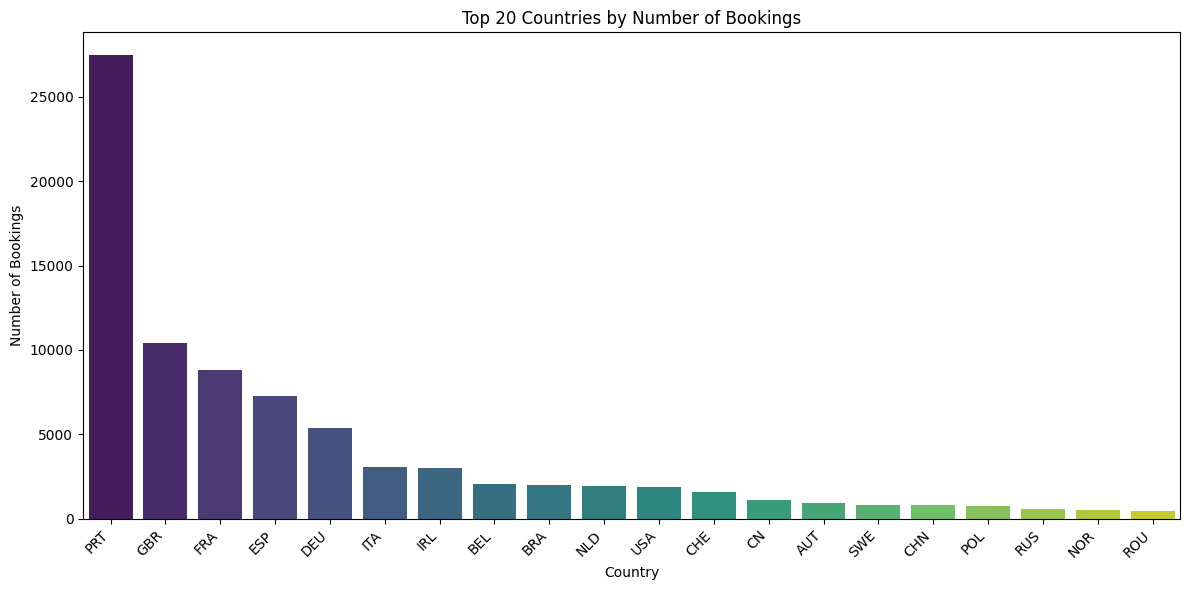

In [ ]:

# top 20 paises
top_20_countries = df['country'].value_counts().nlargest(20)

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values, palette='viridis')
plt.title('Top 20 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualizing Boxplots of Selected Numerical Variables (Separately):


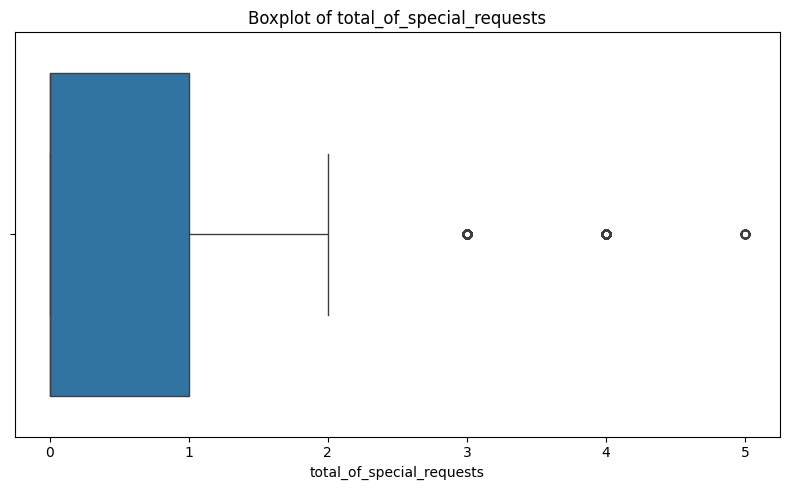

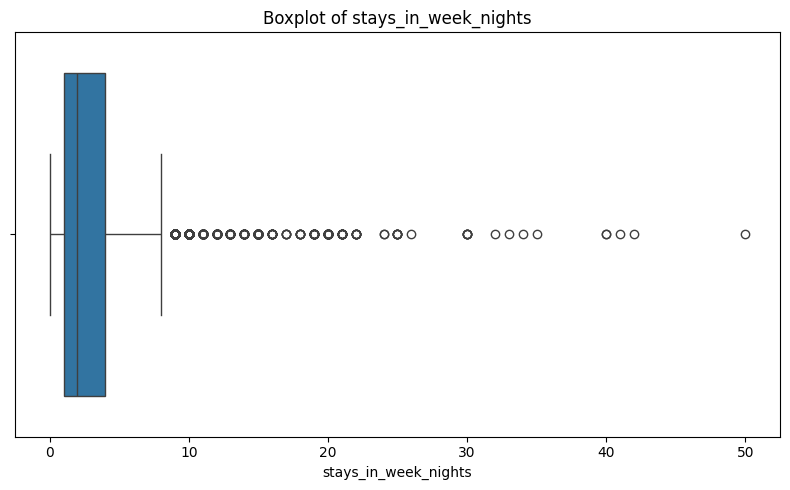

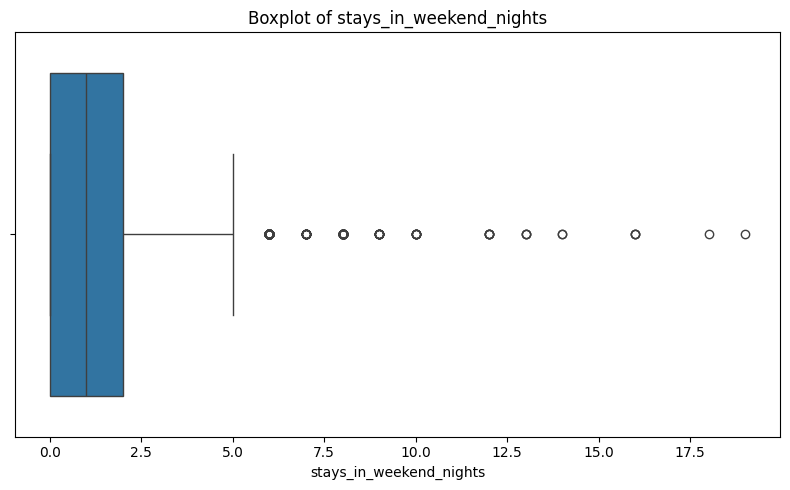

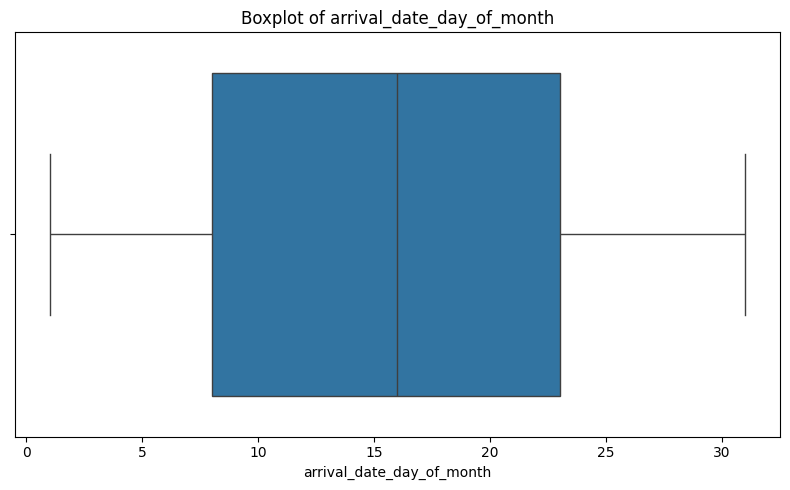

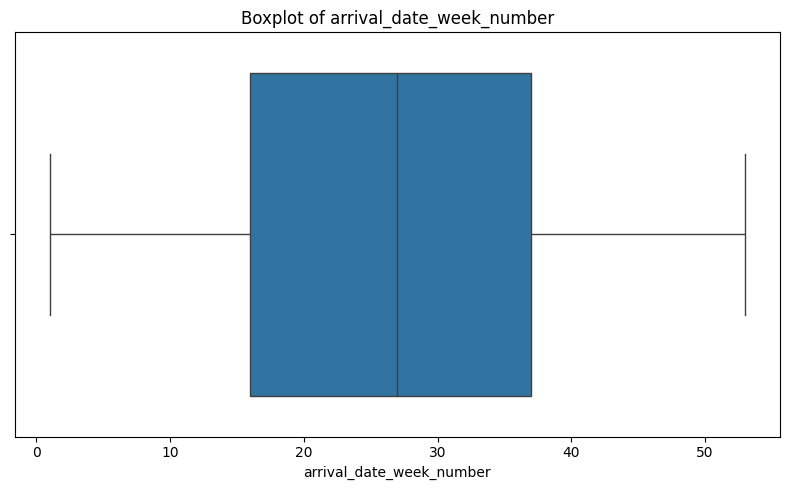

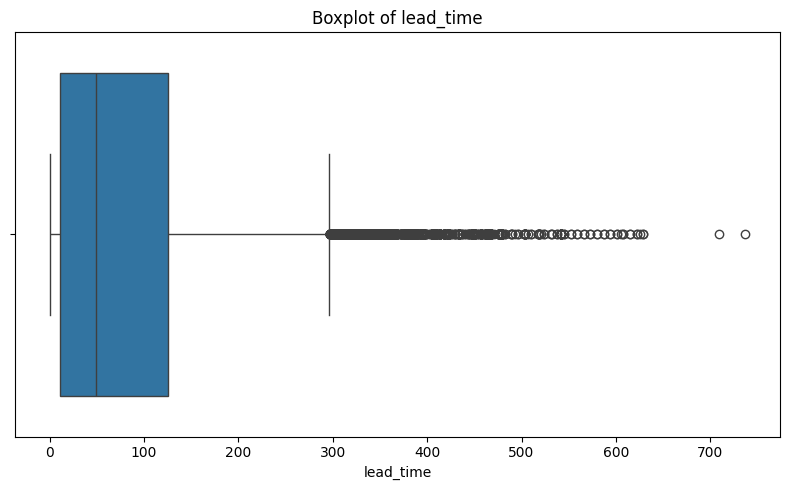

In [ ]:

numerical_cols_for_viz = [
    'total_of_special_requests',
    'stays_in_week_nights',
    'stays_in_weekend_nights',
    'arrival_date_day_of_month',
    'arrival_date_week_number',
    'lead_time'
]

print("Visualizing Boxplots of Selected Numerical Variables (Separately):")

for col in numerical_cols_for_viz:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

##Outliers

In [ ]:


# Seleccionamos las columnas numericas para detectar outliers.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_outliers = [col for col in numerical_cols if col not in ['arrival_date_year', 'agent']] # Excluded agent as it's more of an ID

outlier_info = {}

for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    outlier_info[col] = {
        'Number of Outliers': num_outliers,
        'Percentage of Outliers': percentage_outliers
    }

outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index')
outlier_df = outlier_df.sort_values(by='Percentage of Outliers', ascending=False) # Sort by percentage

print("Number and Percentage of Outliers per Numerical Variable (IQR Method):")
display(outlier_df)

Number and Percentage of Outliers per Numerical Variable (IQR Method):


,Number of Outliers,Percentage of Outliers
adults,22894,26.197805
booking_changes,15902,18.196798
children,8364,9.570999
required_car_parking_spaces,7313,8.368330
previous_bookings_not_canceled,3545,4.056575
is_repeated_guest,3415,3.907814
total_of_special_requests,2673,3.058737
adr,2490,2.849329
lead_time,2396,2.741764
previous_cancellations,1685,1.928160


In [ ]:

# Obtenemos la lista de columnas numéricas con valores atípicos del análisis previo
# Podemos usar el índice del DataFrame outlier_df (creado en la celda nHLBNrG0eeJf)
# Excluimos las columnas que no fueron consideradas para la detección de valores atípicos (como el año y el agente)
cols_with_outliers = outlier_df.index.tolist()
cols_to_test_normality = [col for col in cols_with_outliers if col not in ['arrival_date_year', 'agent']]

print("Prueba de Shapiro-Wilk para la Normalidad en Variables con Valores Atípicos:")

# Realizamos la prueba de Shapiro-Wilk para cada columna seleccionada
# La prueba de Shapiro-Wilk es sensible al tamaño de la muestra. Para grandes conjuntos de datos,
# casi siempre rechaza la hipótesis nula de normalidad.
# Es una práctica común muestrear alrededor de 1000-5000 puntos de datos para Shapiro-Wilk
normality_test_results = {}
for col in cols_to_test_normality:
    if len(df[col]) > 5000:
        sample_data = df[col].sample(n=5000, random_state=42).dropna() # Muestrear y eliminar NaNs
    else:
        sample_data = df[col].dropna() # Eliminar NaNs si no se muestrea

    if len(sample_data) > 0:
        try:
            stat, p_value = shapiro(sample_data)
            normality_test_results[col] = {'Estadístico Shapiro': stat, 'Valor p': p_value}
        except Exception as e:
            normality_test_results[col] = {'Estadístico Shapiro': 'Error', 'Valor p': 'Error', 'Mensaje de Error': str(e)}
    else:
         normality_test_results[col] = {'Estadístico Shapiro': np.nan, 'Valor p': np.nan, 'Mensaje de Error': 'No hay datos después de eliminar NaNs'}


# Mostramos los resultados
normality_df = pd.DataFrame.from_dict(normality_test_results, orient='index')

# Agregamos una columna que indica la normalidad basada en el valor p
alpha = 0.05
normality_df['Es_Normal'] = normality_df['Valor p'].apply(lambda x: 'Sí' if x >= alpha else ('No' if x < alpha else 'N/A'))


display(normality_df)

# Interpretación:
# Un valor p bajo (típicamente < 0.05) indica el rechazo de la hipótesis nula de normalidad.
# Debido al gran tamaño de la muestra, incluso con muestreo, se esperan valores p bajos para la mayoría de las variables,
# confirmando la no normalidad que a menudo es visualmente aparente con los valores atípicos.


Shapiro-Wilk Test for Normality on Variables with Outliers:


,Shapiro Statistic,P-value,Is_Normal
adults,0.689987,3.730989e-70,No
booking_changes,0.452084,3.856288e-82,No
children,0.350816,6.761987e-86,No
required_car_parking_spaces,0.297506,1.129668e-87,No
previous_bookings_not_canceled,0.106067,3.245208e-93,No
is_repeated_guest,0.216851,3.759416e-90,No
total_of_special_requests,0.779417,1.874764e-63,No
adr,0.963312,7.814551e-34,No
lead_time,0.835768,6.340668e-58,No
previous_cancellations,0.071069,4.094035e-94,No


In [ ]:

# Obtenemos la lista de columnas numéricas con valores atípicos del análisis previo
# Podemos usar el índice del DataFrame outlier_df (creado en la celda nHLBNrG0eeJf)
cols_with_outliers = outlier_df.index.tolist()
cols_to_transform = [col for col in cols_with_outliers if col not in ['arrival_date_year', 'agent', 'is_canceled', 'arrival_date_week_number', 'arrival_date_day_of_month']] # Excluimos columnas binarias, año y columnas tipo ID, y aquellas sin valores atípicos

# Aplicamos la transformación (Box-Cox o Yeo-Johnson) y creamos nuevas columnas
df_transformed = df.copy()
transformed_cols_info = {}

print("Aplicando transformación y verificando valores atípicos en columnas transformadas:")

for col in cols_to_transform:
    min_value = df_transformed[col].min()

    if min_value < 0:
        # Usamos la transformación de Yeo-Johnson para valores negativos
        transformed_data, lambda_value = yeojohnson(df_transformed[col])
        new_col_name = f"{col}_yeojohnson"
        transform_type = "Yeo-Johnson"
    elif min_value == 0:
         # Usamos Box-Cox con +1 para valores cero
        transformed_data, lambda_value = boxcox(df_transformed[col] + 1)
        new_col_name = f"{col}_boxcox_plus1"
        transform_type = "Box-Cox (+1)"
    else:
        # Usamos Box-Cox para valores positivos
        transformed_data, lambda_value = boxcox(df_transformed[col])
        new_col_name = f"{col}_boxcox"
        transform_type = "Box-Cox"


    df_transformed[new_col_name] = transformed_data
    transformed_cols_info[col] = {'Transformed_Column': new_col_name, 'Transformation_Type': transform_type, 'Lambda': lambda_value}

    # Ahora, volvemos a verificar los valores atípicos en la columna transformada usando el método IQR
    Q1_transformed = df_transformed[new_col_name].quantile(0.25)
    Q3_transformed = df_transformed[new_col_name].quantile(0.75)
    IQR_transformed = Q3_transformed - Q1_transformed

    lower_bound_transformed = Q1_transformed - 1.5 * IQR_transformed
    upper_bound_transformed = Q3_transformed + 1.5 * IQR_transformed

    outliers_transformed = df_transformed[(df_transformed[new_col_name] < lower_bound_transformed) | (df_transformed[new_col_name] > upper_bound_transformed)]
    num_outliers_transformed = len(outliers_transformed)
    percentage_outliers_transformed = (num_outliers_transformed / len(df_transformed)) * 100

    transformed_cols_info[col].update({
        'Number of Outliers (Transformed)': num_outliers_transformed,
        'Percentage of Outliers (Transformed)': percentage_outliers_transformed
    })

# Mostramos la información de los valores atípicos para las columnas transformadas
transformed_outlier_df = pd.DataFrame.from_dict(transformed_cols_info, orient='index')
transformed_outlier_df = transformed_outlier_df.sort_values(by='Percentage of Outliers (Transformed)', ascending=False)

display(transformed_outlier_df)

# Nota: Aunque las transformaciones pueden ayudar con la no normalidad y a menudo reducen los valores atípicos,
# puede que no eliminen todos los valores atípicos, especialmente en las colas de la distribución.
# El método de Tukey (IQR) aún podría identificar valores como atípicos incluso después de la transformación.


Applying Transformation and Checking for Outliers on Transformed Columns:


,Transformed_Column,Transformation_Type,Lambda,Number of Outliers (Transformed),Percentage of Outliers (Transformed)
adults,adults_boxcox_plus1,Box-Cox (+1),0.379355,22894,26.197805
booking_changes,booking_changes_boxcox_plus1,Box-Cox (+1),-6.084099,15902,18.196798
children,children_boxcox_plus1,Box-Cox (+1),-11.943733,8364,9.570999
required_car_parking_spaces,required_car_parking_spaces_boxcox_plus1,Box-Cox (+1),-17.182835,7313,8.368330
previous_bookings_not_canceled,previous_bookings_not_canceled_boxcox_plus1,Box-Cox (+1),-18.550938,3545,4.056575
is_repeated_guest,is_repeated_guest_boxcox_plus1,Box-Cox (+1),-36.918208,3415,3.907814
adr,adr_yeojohnson,Yeo-Johnson,0.620577,3171,3.628603
previous_cancellations,previous_cancellations_boxcox_plus1,Box-Cox (+1),-62.377630,1685,1.928160
babies,babies_boxcox_plus1,Box-Cox (+1),-135.922473,914,1.045898
days_in_waiting_list,days_in_waiting_list_boxcox_plus1,Box-Cox (+1),-25.720738,860,0.984106


In [ ]:
df["adults"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
df["children"].unique()

<IntegerArray>
[0, 1, 2, 10, 3]
Length: 5, dtype: Int64

In [ ]:
df["booking_changes"].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

Unique values of original 'booking_changes' column:


array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])


Unique values of winsorized 'booking_changes_winsorized' column:


array([2, 0, 1])

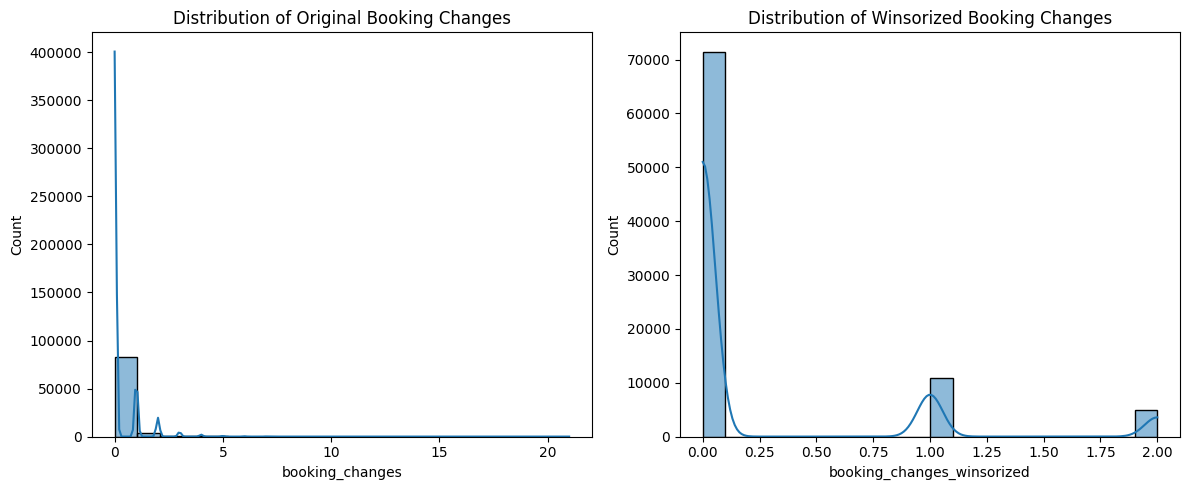

In [ ]:

df['booking_changes_winsorized'] = winsorize(df['booking_changes'], limits=[0, 0.05])

print("Unique values of original 'booking_changes' column:")
display(df['booking_changes'].unique())

print("\nUnique values of winsorized 'booking_changes_winsorized' column:")
display(df['booking_changes_winsorized'].unique())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['booking_changes'], bins=20, kde=True)
plt.title('Distribution of Original Booking Changes')

plt.subplot(1, 2, 2)
sns.histplot(df['booking_changes_winsorized'], bins=20, kde=True)
plt.title('Distribution of Winsorized Booking Changes')

plt.tight_layout()
plt.show()

Primero apliamos Box-cox para normalizar las variables. Consideramos que tanto adults como children tienen valores posibles y reales, por lo que los mantendremos como estan. En el caso de booking_changes decidimos winsorizar.

Decidimos no imputar required_car_parking_spaces, previous_bookings_not_canceled, is_repeated_guest, adr, dado que los valores tiene sentido dado el contexto de la base.

## Analisis multivariado

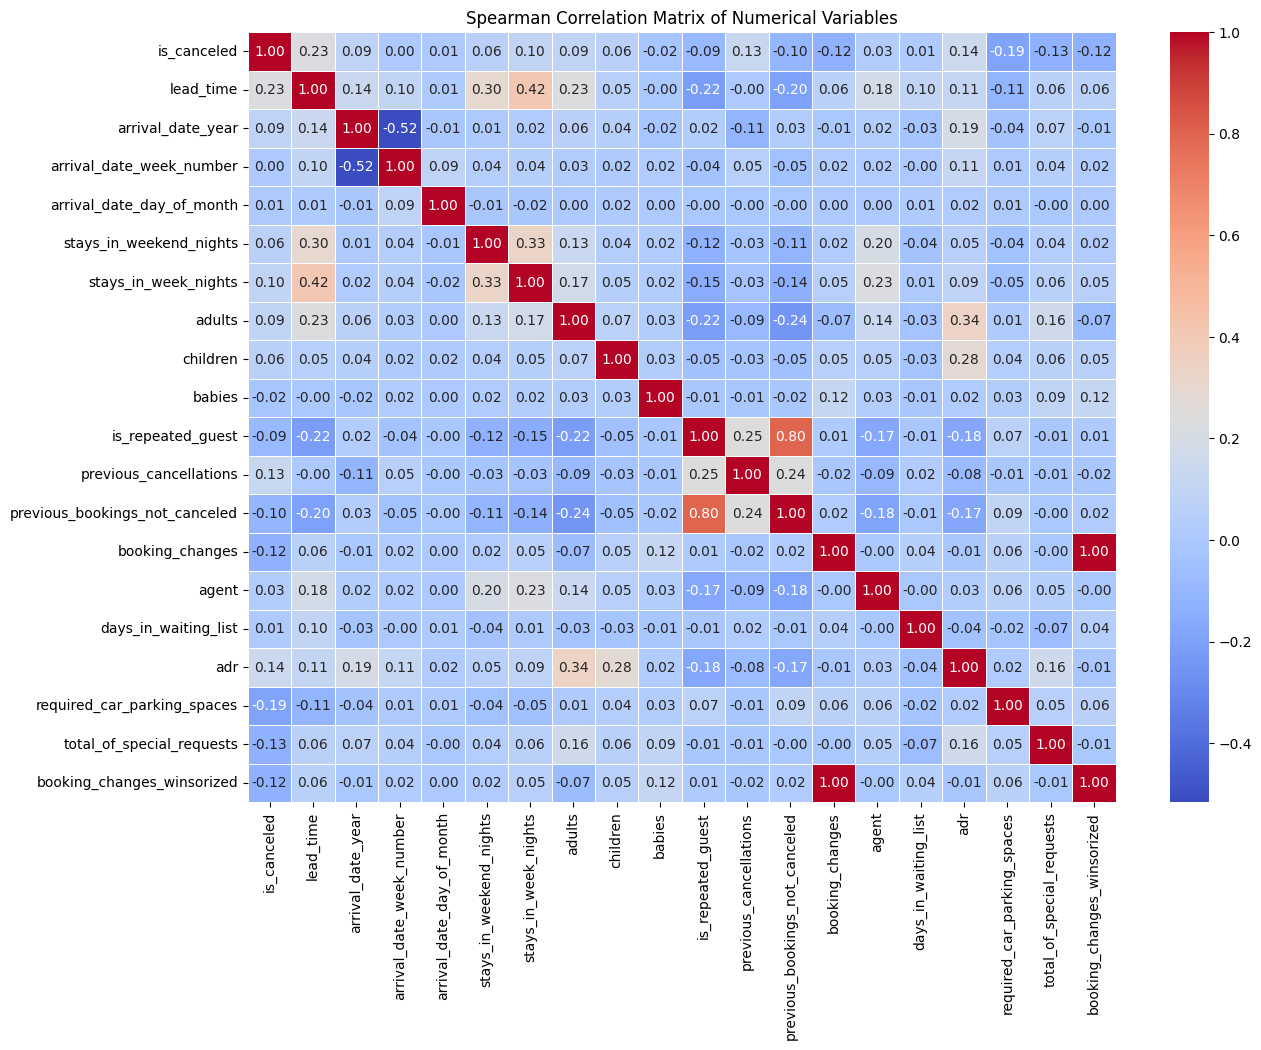

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

correlation_matrix_spearman = df[numerical_cols].corr(method='spearman')

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
correlation_matrix_abs = correlation_matrix_spearman.abs()

stacked_correlations = correlation_matrix_abs.stack()

stacked_correlations_df = stacked_correlations.reset_index()
stacked_correlations_df.columns = ['Variable 1', 'Variable 2', 'Spearman Correlation (Absolute)']

high_correlations = stacked_correlations_df[
    (stacked_correlations_df['Spearman Correlation (Absolute)'] >= 0.69) &
    (stacked_correlations_df['Variable 1'] != stacked_correlations_df['Variable 2'])
]

original_stacked = correlation_matrix_spearman.stack().reset_index()
original_stacked.columns = ['Variable 1', 'Variable 2', 'Spearman Correlation']

high_correlations = high_correlations.merge(original_stacked, on=['Variable 1', 'Variable 2'])

high_correlations['Pair'] = high_correlations.apply(
    lambda row: tuple(sorted((row['Variable 1'], row['Variable 2']))), axis=1
)
high_correlations.drop_duplicates(subset=['Pair'], inplace=True)

correlation_table = high_correlations[['Variable 1', 'Variable 2', 'Spearman Correlation']]

print("Pairs of Numerical Variables with Spearman Correlation >= 0.69:")
display(correlation_table.sort_values(by='Spearman Correlation', ascending=False))

Pairs of Numerical Variables with Spearman Correlation >= 0.69:


,Variable 1,Variable 2,Spearman Correlation
2,booking_changes,booking_changes_winsorized,0.999865
0,is_repeated_guest,previous_bookings_not_canceled,0.797191


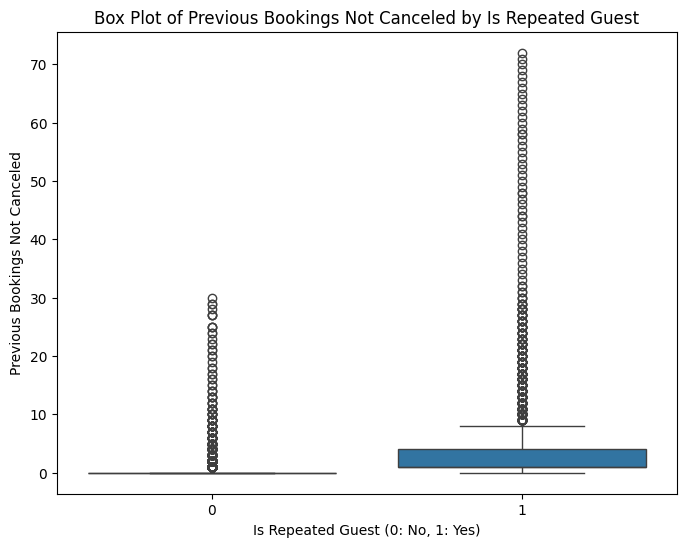

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_repeated_guest', y='previous_bookings_not_canceled')
plt.title('Box Plot of Previous Bookings Not Canceled by Is Repeated Guest')
plt.xlabel('Is Repeated Guest (0: No, 1: Yes)')
plt.ylabel('Previous Bookings Not Canceled')
plt.show()

## Test de Hipotesis


*   h1: El segmento del mercado influye en el tipo de habitación reservada.
*   h2: Un precio promedio alto tiene una relación directa con las cancelaciones.
*   h3: La cantidad de noches reservadas se relaciona con el precio.
*   h4: El tipo de “lead” afecta la tasa de cancelación.






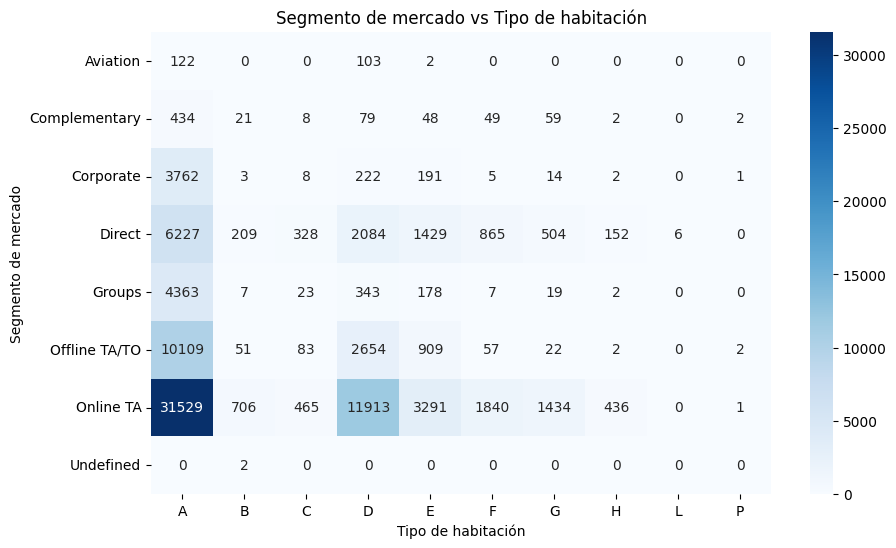

In [ ]:
# Crosstab
contingency = pd.crosstab(df["market_segment"], df["reserved_room_type"])

plt.figure(figsize=(10,6))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues")
plt.title("Segmento de mercado vs Tipo de habitación")
plt.ylabel("Segmento de mercado")
plt.xlabel("Tipo de habitación")
plt.show()

Utilizamos crosstab dado que ambas variables son categoricas. El grafico de contingencia nos permite ver las dsitribucines conjuntas de las variables, y podemos ver la asociacion o dependencia entre ellas.

In [ ]:
#h1
contingency = pd.crosstab(df["market_segment"], df["reserved_room_type"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-cuadrado:", chi2, " - p-valor:", p)
if p < 0.05:
    print("Se rechaza la hipótesis nula. El segmento del mercado influye en el tipo de habitación reservada.")

Chi-cuadrado: 6465.7775824150995  - p-valor: 0.0
Se rechaza la hipótesis nula. El segmento del mercado influye en el tipo de habitación reservada.


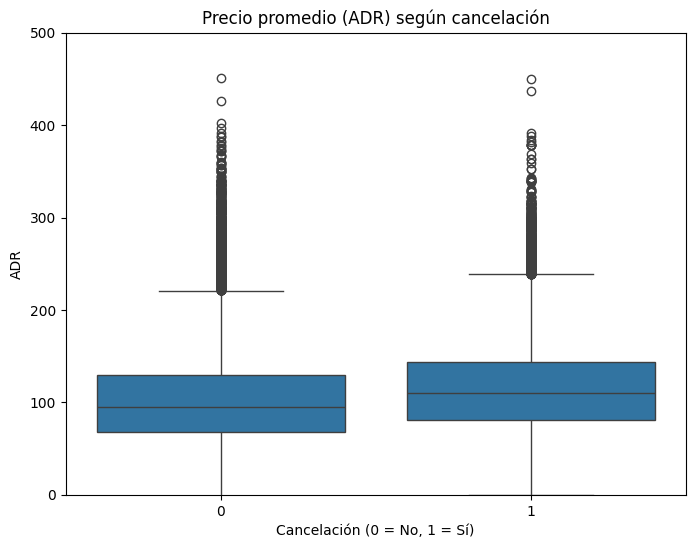

In [ ]:
#h2 grafico:
plt.figure(figsize=(8,6))
sns.boxplot(x="is_canceled", y="adr", data=df)
plt.title("Precio promedio (ADR) según cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("ADR")
plt.ylim(0, 500)
plt.show()

Usamos el t-test dado que tenemos una variable continua (precio) y una binaria (cancelacion), podemos comparar la media del orecuo pomedio en los dos grupos y ver si existe una diferencia entre ellos.

In [ ]:

#ttest
canceled = df[df["is_canceled"] == 1]["adr"].dropna()
not_canceled = df[df["is_canceled"] == 0]["adr"].dropna()

t_stat, p = ttest_ind(canceled, not_canceled, equal_var=False)
print("t-test:", t_stat, " - p-valor:", p)
if p < 0.05:
    print("Se rechaza la hipótesis nula. Un precio promedio alto tiene una relación directa con las cancelaciones.")

t-test: 35.04514854787771  - p-valor: 9.673502056695827e-265
Se rechaza la hipótesis nula. Un precio promedio alto tiene una relación directa con las cancelaciones.


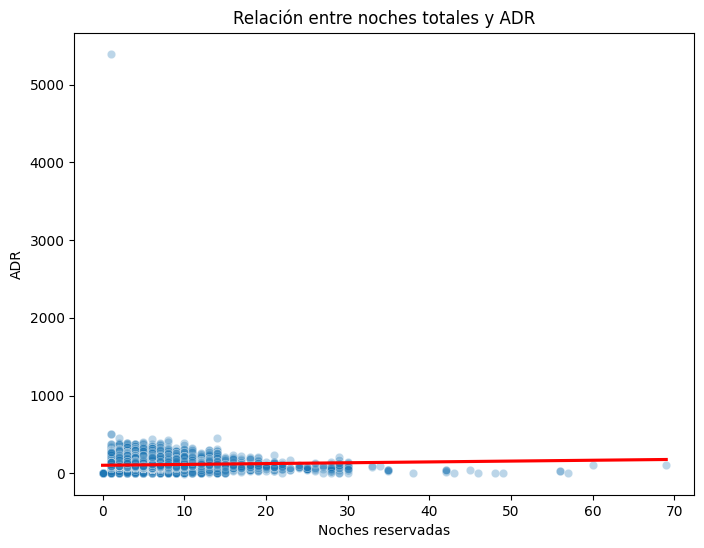

In [ ]:
#h3 grafico;
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

plt.figure(figsize=(8,6))
sns.scatterplot(x="total_nights", y="adr", alpha=0.3, data=df)
sns.regplot(x="total_nights", y="adr", data=df, scatter=False, color="red")
plt.title("Relación entre noches totales y ADR")
plt.xlabel("Noches reservadas")
plt.ylabel("ADR")
plt.show()

Ambas variables son cuantitativas continuas. Al utilizar Pearson venis la relacion lineal entre estas variables.

In [ ]:
#h3:


df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

corr, p = stats.pearsonr(df["total_nights"], df["adr"])
print("Correlación:", corr, " - p-valor:", p)
if p < 0.05:
    print("Se rechaza la hipótesis nula. La cantidad de noches reservadas se relaciona con el precio.")

Correlación: 0.05413357127616799  - p-valor: 1.0157615286015221e-57
Se rechaza la hipótesis nula. La cantidad de noches reservadas se relaciona con el precio.


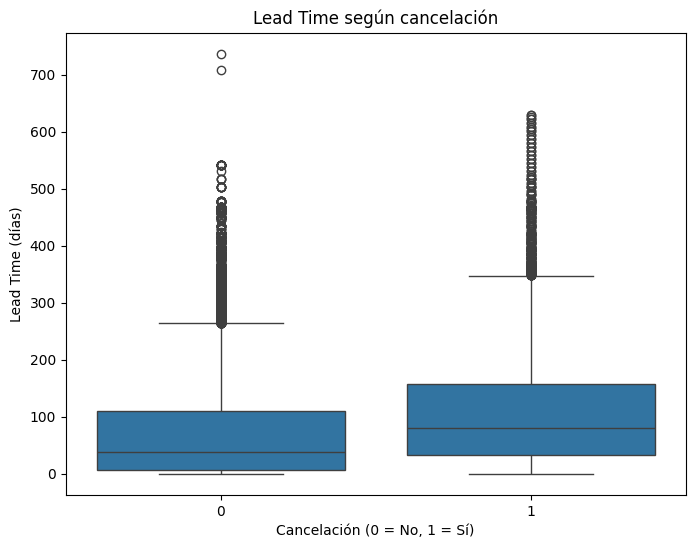

In [ ]:
#h4 grafico:
plt.figure(figsize=(8,6))
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time según cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Lead Time (días)")
plt.show()


Comparamos la media del lead time y las cancelaciones. Tenemos una variable continua y una binaria.

In [ ]:
#h4;
canceled_lead = df[df["is_canceled"] == 1]["lead_time"]
not_canceled_lead = df[df["is_canceled"] == 0]["lead_time"]

t_stat, p = ttest_ind(canceled_lead, not_canceled_lead, equal_var=False)
print("t-test lead_time:", t_stat, " - p-valor:", p)

if p < 0.05:
    print ("Se rechaza la hipótesis nula. El tipo de 'lead' afecta la tasa de cancelación.")

t-test lead_time: 52.70746002669423  - p-valor: 0.0
Se rechaza la hipótesis nula. El tipo de 'lead' afecta la tasa de cancelación.


# **TP 3**

Conclusiones test hipotesis:


*   El segmento del mercado influye en el tipo de habitación reservada.

*  Un precio promedio alto tiene una relación directa con las cancelaciones.

*   La cantidad de noches reservadas se relaciona con el precio.

*   El tipo de 'lead' afecta la tasa de cancelación.

Dada los resultados de los test de hipotesis, consideramos que todos los hallazgos son valiosos para nuestros analaisis.


In [ ]:
# Guardar el  DataFrame final en un archivo CSV
df.to_csv('processed_hotel_bookings_final.csv', index=False)

print("DataFrame saved to 'processed_hotel_bookings.csv'")

DataFrame saved to 'processed_hotel_bookings.csv'


In [ ]:
from google.colab import files

files.download('processed_hotel_bookings_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Preprocesamiento para machine learning


##Encoding de variables categóricas

Utilizamos one-hot encoding dado que la varaibles categoricas son nominales y no ordinales, es decir que no exsite  jerarquia entre las mismas. Excluimos "reservation status" dado que es nuestro target.

In [ ]:

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols_for_encoding = [col for col in categorical_cols if col not in ['reservation_status', 'reservation_status_date']]

print("Categorical columns to be encoded:", categorical_cols_for_encoding)

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_for_encoding, dummy_na=False) # dummy_na=False means NaNs are not encoded as a separate column


print("\DataFrame despues de  one-hot encoding:", df_encoded.shape)
print("\nPrimeras 5 filas del DataFrame one-hot encoding:")
display(df_encoded.head())

Categorical columns to be encoded: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
\DataFrame despues de  one-hot encoding: (87389, 262)

Primeras 5 filas del DataFrame one-hot encoding:


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-2936888785.py:10: SyntaxWarning: invalid escape sequence '\D'
  print("\DataFrame despues de  one-hot encoding:", df_encoded.shape)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0,0,...,False,False,False,True,False,False,False,False,True,False
1,0,737,2015,27,1,0,0,2,0,0,...,False,False,False,True,False,False,False,False,True,False
2,0,7,2015,27,1,0,1,1,0,0,...,False,False,False,True,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0,0,...,False,False,False,True,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0,0,...,False,False,False,True,False,False,False,False,True,False


### Escalamiento/normalización de variables numéricas

Utilizamos StandarScaler para estandarizar las variables excluyendo las columnas'agent' porque es un Id, 'is_canceled' porque es el traget,y  'arrival_date_year' porque es una fecha.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Exculuimos  la variable 'is_canceled'
numerical_cols_encoded = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling = [col for col in numerical_cols_encoded if col not in ['is_canceled', 'arrival_date_year', 'agent']]

print("Columnas numericas a ser estandarizadas:", numerical_cols_for_scaling)

# StandardScaler
scaler = StandardScaler()

df_encoded[numerical_cols_for_scaling] = scaler.fit_transform(df_encoded[numerical_cols_for_scaling])

print("\nPrimeras 5 filas del DataFrame depspues del scaling:")
display(df_encoded.head())

Columnas numericas a ser estandarizadas: ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'booking_changes_winsorized', 'total_nights']

Primeras 5 filas del DataFrame depspues del scaling:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,3.045838,2015,0.011865,-1.676896,-0.974216,-1.278523,0.198181,-0.304121,-0.095292,...,False,False,False,True,False,False,False,False,True,False
1,0,7.636044,2015,0.011865,-1.676896,-0.974216,-1.278523,0.198181,-0.304121,-0.095292,...,False,False,False,True,False,False,False,False,True,False
2,0,-0.847122,2015,0.011865,-1.676896,-0.974216,-0.791568,-1.398023,-0.304121,-0.095292,...,False,False,False,True,False,False,False,False,True,False
3,0,-0.777397,2015,0.011865,-1.676896,-0.974216,-0.791568,-1.398023,-0.304121,-0.095292,...,False,False,False,True,False,False,False,False,True,False
4,0,-0.765776,2015,0.011865,-1.676896,-0.974216,-0.304613,0.198181,-0.304121,-0.095292,...,False,False,False,True,False,False,False,False,True,False


Revision de Multicolinealidad

(esto no lo vimos en esta materia lo vimos en estadistica, no sabemos si era a lo que se referian con la consigna)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionamos las columnas numéricas del DataFrame codificado para el cálculo del VIF
# Excluimos la variable objetivo 'is_canceled' y cualquier columna con muy baja varianza o que no sea adecuada para VIF
numerical_cols_for_vif = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_vif = [col for col in numerical_cols_for_vif if col not in ['is_canceled']] # Excluimos la variable objetivo


# Calculamos el VIF para cada característica
vif_data = pd.DataFrame()
# Necesitamos manejar posibles valores VIF infinitos si hay multicolinealidad perfecta (por ejemplo, por one-hot encoding)
# Podemos añadir una pequeña constante o usar un bloque try-except
vif_data["feature"] = numerical_cols_for_vif
vif_data["VIF"] = [variance_inflation_factor(df_encoded[numerical_cols_for_vif].values, i)
                     for i in range(len(numerical_cols_for_vif))]

# Mostramos los valores VIF, ordenados de forma descendente
print("Factor de Inflación de la Varianza (VIF) para las Características Numéricas:")
display(vif_data.sort_values(by='VIF', ascending=False))

# Interpretación de los valores VIF:
# VIF = 1: No hay correlación entre la característica y otras características.
# 1 < VIF < 5: Correlación moderada.
# VIF >= 5 o 10: Altamente correlacionada (potencial problema de multicolinealidad).


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factor (VIF) for Numerical Features:


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
5,stays_in_week_nights,inf
19,total_nights,inf
4,stays_in_weekend_nights,inf
18,booking_changes_winsorized,4.979548
12,booking_changes,4.963656
13,agent,1.649254
1,arrival_date_year,1.580308
11,previous_bookings_not_canceled,1.416208
9,is_repeated_guest,1.307594
15,adr,1.242255


PCA

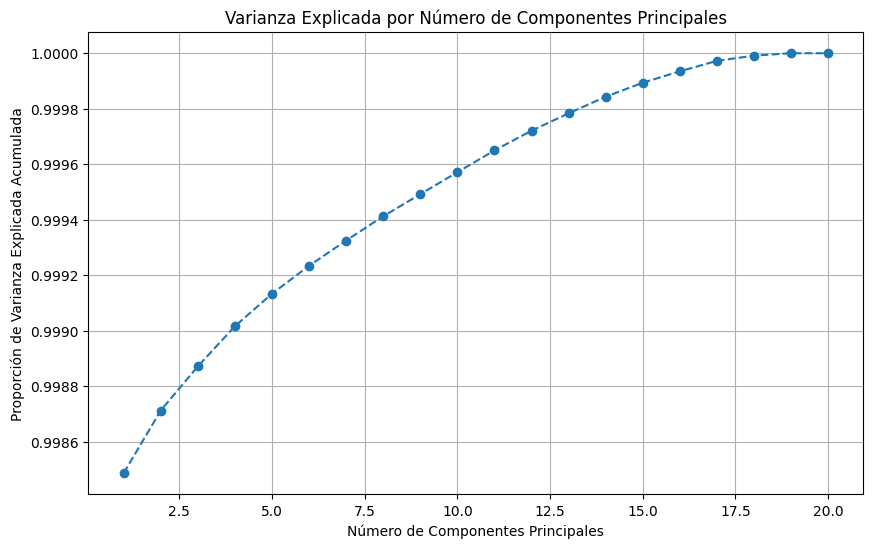

Proporción de Varianza Explicada para Cada Componente Principal:


,Proporción de Varianza Explicada
0,0.998486
1,0.000226
2,0.000159
3,0.000145
4,0.000117
5,0.000101
6,0.000091
7,0.000087
8,0.000080
9,0.000079



Proporción de Varianza Explicada Acumulada:


,Proporción de Varianza Explicada Acumulada
0,0.998486
1,0.998712
2,0.998871
3,0.999016
4,0.999133
5,0.999234
6,0.999325
7,0.999412
8,0.999492
9,0.999571


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separar características (X) y variable objetivo (y)
# Asumiendo que 'is_canceled' es la variable objetivo
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

# Seleccionar solo características numéricas para PCA
# Excluir columnas booleanas creadas durante la codificación one-hot si es necesario, aunque PCA puede manejarlas.
# Seleccionemos todas las columnas numéricas que no son la variable objetivo.
X_numerical = X.select_dtypes(include=np.number)


# Inicializar PCA
pca = PCA()

# Ajustar PCA a las características numéricas escaladas
pca.fit(X_numerical)

# Graficar la proporción de varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada por Número de Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Mostrar la proporción de varianza explicada para cada componente
print("Proporción de Varianza Explicada para Cada Componente Principal:")
display(pd.DataFrame({'Proporción de Varianza Explicada': pca.explained_variance_ratio_}))

# Mostrar la proporción de varianza explicada acumulada
print("\nProporción de Varianza Explicada Acumulada:")
display(pd.DataFrame({'Proporción de Varianza Explicada Acumulada': pca.explained_variance_ratio_.cumsum()}))

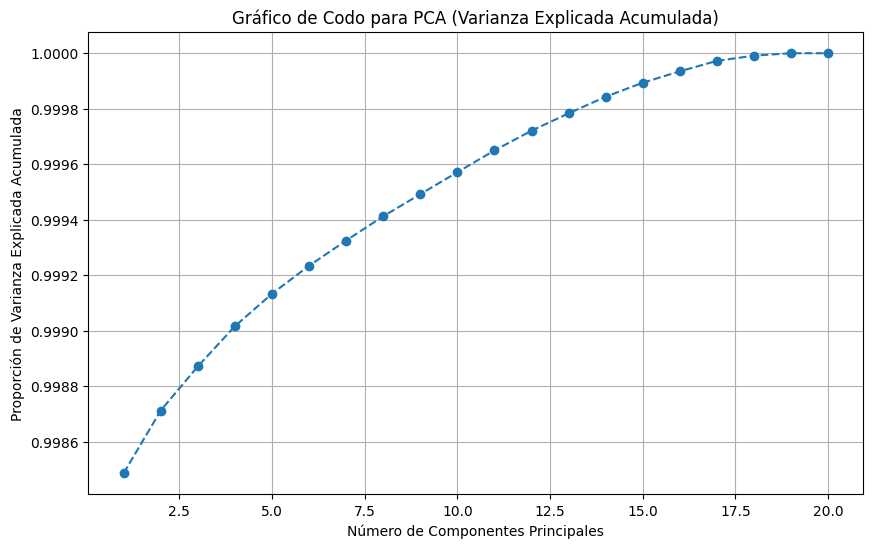

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Gráfico de Codo para PCA (Varianza Explicada Acumulada)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

In [ ]:
#Ya con el primer componente se explica el 	0.998486 de la varianza